In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
sns.set_palette("pastel")

from sklearn.preprocessing import LabelEncoder

In [21]:
df_resid = pd.read_csv('Residential.csv')

# Описание переменных

Для переменных типа bool 'True' обозначает наличи признака, а 'False' - его отсутствие

- `id` - идентификатор объекта; принимает положительные целые значения
- `name` - название объекта, str
- `energy_efficiency` - класс энергетической эффективности объекта, принимающий значение {'G', 'E', 'D', 'C', 'B', 'A', 'A+', 'A++'}; класс A++ обозначает максимальную энергоэффективность, а G - минимальную
- `due_date` - дата ввода объекта в эксплуатацию; в формате годQквартал
- `class` - класс недвижимости, принимающий значения {'Типовой', 'Комфорт', 'Бизнес', 'Элитный'}
- `wall_material` - материал стен, принимающий значения {'Кирпич', 'Монолит-кирпич', 'Другое', 'Монолит', 'Блоки', 'Панель'}
- `n_finish_types`- количество типов отделки, принимающее значения {0, 1, 2, 3}
- `layout_variation` - возможность свободной планировки, принимает значения {'True', 'False'}
- `n_floors` - количество этажей объекта, принимает положительные целые значения
- `n_flats` - количество квартир в объекте, принимает положительные целые значения
- `life_space` - жилая площадь объекта, м², принимает положительные значения
- `min_ceiling_height` - минимальная высота потолков объекта, принимает положительные значения
- `max_ceiling_height` - максимальная высота потолков объекта, принимает положительные значения
- `bike_paths` - наличие велосипедных дорожек, принимает значения {'True', 'False'}
- `n_playgrounds` - количество детских игровых площадок, принимает неотрицательные целые значения
- `n_sportsgrounds` - количество спортивных площадок, принимает неотрицательные целые значения
- `n_garbage_sites` - количество площадок для сбора мусора, принимает неотрицательные целые значения
- `n_parking_places` - количество парковочных мест, принимает положительные целые значения
- `ramp` - наличие пандусов, принимает значения {'True', 'False'}
- `lowering_platforms` - наличие понижающих площадок, принимает значения {'True', 'False'}
- `n_wheelchair_lifts` - количество инвалидных подъемников, принимает неотрицательные целые значения
- `n_entrances` - количество подъездов, принимает положительные целые значения
- `n_p_lifts` - количество пассажирских лифтов, принимает неотрицательные целые значения
- `n_f_lifts` - количество грузовых лифтов, принимает неотрицательные целые значения
- `n_lifts` - суммарное количество грузовых и пассажирских лифтов (`n_lifts = n_p_lifts + n_f_lifts`), принимает неотрицательные целые значения
- `infrastr_access` - доступность инфраструктуры, принимает целые значения от 1 до 10, где 1 - минимальное значение, а 10 - максимальное
- `transport_access` - транспортная доступность, принимает целые значения от 1 до 10, где 1 - минимальное значение, а 10 - максимальное
- `green_areas` - индекс наличия зеленых зон, принимает целые значения от 1 до 10, где 1 - минимальное значение, а 10 - максимальное
- `air_quality` - качество воздуха, принимает целые значения от 1 до 10, где 1 - минимальное значение, а 10 - максимальное
- `av_flat` - средняя площадь квартиры, м² (`av_flat = life_space / n_flats`), принимает положительные значения
- `n_p_s_grounds` - суммарное количество спортивных и детских игровых площадок (`n_p_s_grounds = n_playgrounds + n_sportsgrounds`), принимает неотрицательные целые значения
- `lift_ratio` - производный показатель - лифтовооруженность, демонстрирующий оснащенность лифтами (`lift_ratio = n_flats - (n_flats/n_floors)(1 + 0,75 + 0,5 + 0,25 + 0,2)`), принимает неотрицательные значения
- `low_mobility_facilities` - индекс доступности среды для маломобильных лиц (`low_mobility_facilities = 0,5 * (ramp + lowering_platforms)`); принимает значения {0, 0,5, 1}, где 0 - отсутствие пандусов и понижающих платформ, 0,5 - наличие одного из двух признаков, 1 - наличие и пандусов, и понижающих платформ

In [22]:
df_resid.head()

,id,name,energy_efficiency,due_date,class,wall_material,n_finish_types,layout_variation,n_floors,n_flats,...,low_mobility_facilities,n_entrances,n_p_lifts,n_f_lifts,n_lifts,lift_ratio,infrastr_access,transport_access,green_areas,air_quality
0,50878,"п. Металлплощадка, б-р Строителей, д. 71, корп...",B,2025Q4,Типовой,Кирпич,1,True,4,50,...,0.5,7.0,0,0,0,0.000000,5,NaN,NaN,NaN
1,41995,"ЖК ""Челны Сити""",A+,2024Q3,Комфорт,Кирпич,0,False,27,312,...,0.5,2.0,2,4,6,46.800000,8,NaN,NaN,NaN
2,54453,"ЖК ""Челны Сити""",C,2025Q2,Комфорт,Монолит-кирпич,0,False,21,238,...,0.5,1.0,3,0,3,69.133333,8,NaN,NaN,NaN
3,45490,DOGMA,B,2026Q2,Комфорт,Монолит-кирпич,1,False,17,856,...,0.5,5.0,5,5,10,72.004706,5,NaN,NaN,NaN
4,45491,DOGMA,B,2026Q2,Комфорт,Монолит-кирпич,1,False,17,666,...,0.5,4.0,4,4,8,70.027941,6,NaN,NaN,NaN


In [23]:
# Преобразование формата даты "годQквартал" в стандартный формат даты
df_resid['due_date'] = df_resid['due_date'].str.replace('Q', '-').str.replace('квартал', '')
df_resid['due_date'] = pd.to_datetime(df_resid['due_date'])

# Визуализации и первичные гипотезы

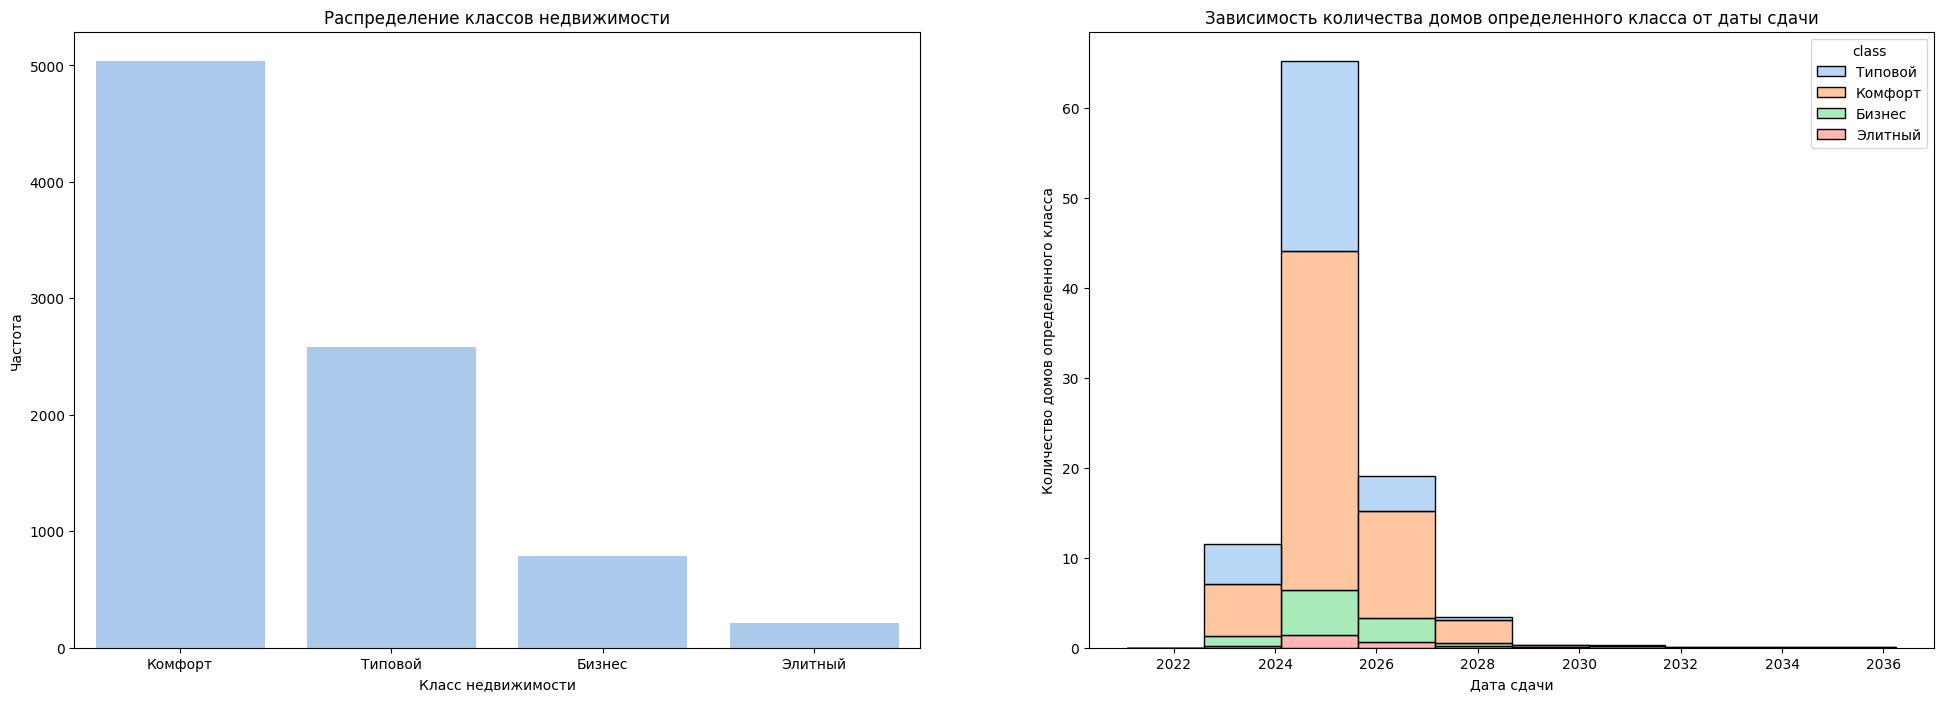

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(24, 8))


# Построение распределения классов недвижимости
sns.barplot(x=df_resid['class'].value_counts().index, y=df_resid['class'].value_counts().values, ax=axs[0])
axs[0].set_title('Распределение классов недвижимости')
axs[0].set_xlabel('Класс недвижимости')
axs[0].set_ylabel('Частота')

# Построение зависимости количества домов определенного класса от даты сдачи
sns.histplot(data=df_resid, x='due_date', hue='class', stat='percent', multiple='stack', palette='pastel', ax=axs[1], legend=True, bins=10)
axs[1].set_xlabel('Дата сдачи')
axs[1].set_ylabel('Количество домов определенного класса')
axs[1].set_title('Зависимость количества домов определенного класса от даты сдачи')

plt.show()

Мы видим, что наибольшую часть наших наблюдений составляют дома класса "Комфорт", то есть у нас достаточно несбалансированная выборка. С этим мы будем разбираться позднее.

## Жилая площадь

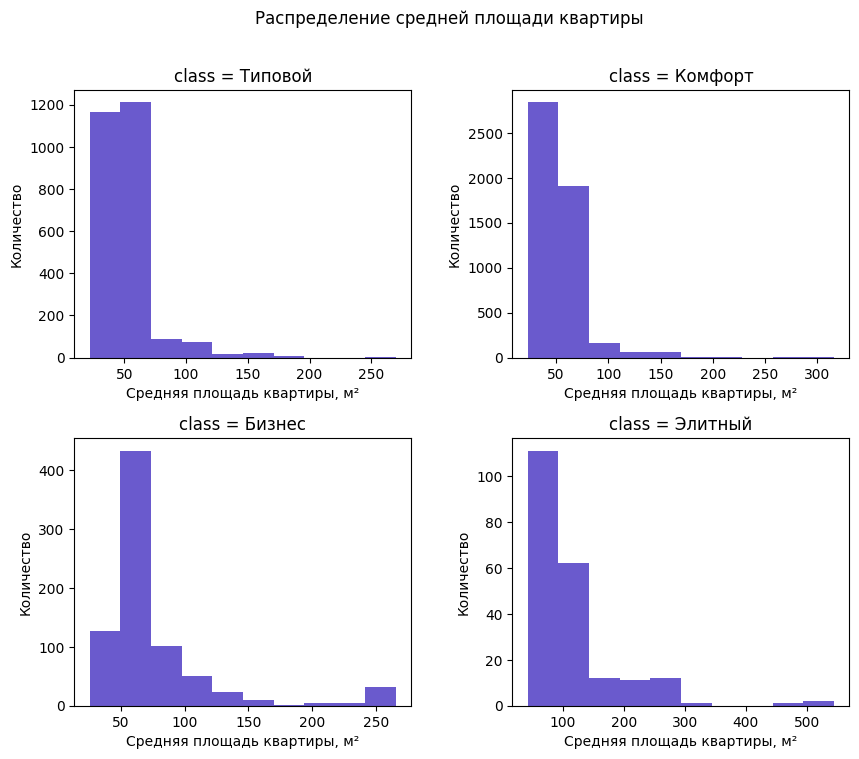

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.hist(df_resid.loc[df_resid['class']=='Типовой']['av_flat'],  linewidth=2, color="slateblue")
ax1.set_title('class = Типовой')
ax1.set_xlabel('Средняя площадь квартиры, м²')
ax1.set_ylabel('Количество')

ax2.hist(df_resid.loc[df_resid['class']=='Комфорт']['av_flat'],linewidth=2, color="slateblue")
ax2.set_title('class = Комфорт')
ax2.set_xlabel('Средняя площадь квартиры, м²')
ax2.set_ylabel('Количество')

ax3.hist(df_resid.loc[df_resid['class']=='Бизнес']['av_flat'], linewidth=2, color="slateblue")
ax3.set_title('class = Бизнес')
ax3.set_xlabel('Средняя площадь квартиры, м²')
ax3.set_ylabel('Количество')

ax4.hist(df_resid.loc[df_resid['class']=='Элитный']['av_flat'], linewidth=2, color="slateblue")
ax4.set_title('class = Элитный')
ax4.set_xlabel('Средняя площадь квартиры, м²')
ax4.set_ylabel('Количество')

pl.suptitle("Распределение средней площади квартиры")
plt.show()

<ipython-input-34-3ec474819dfc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_resid, x='class', y='av_flat', palette='pastel')


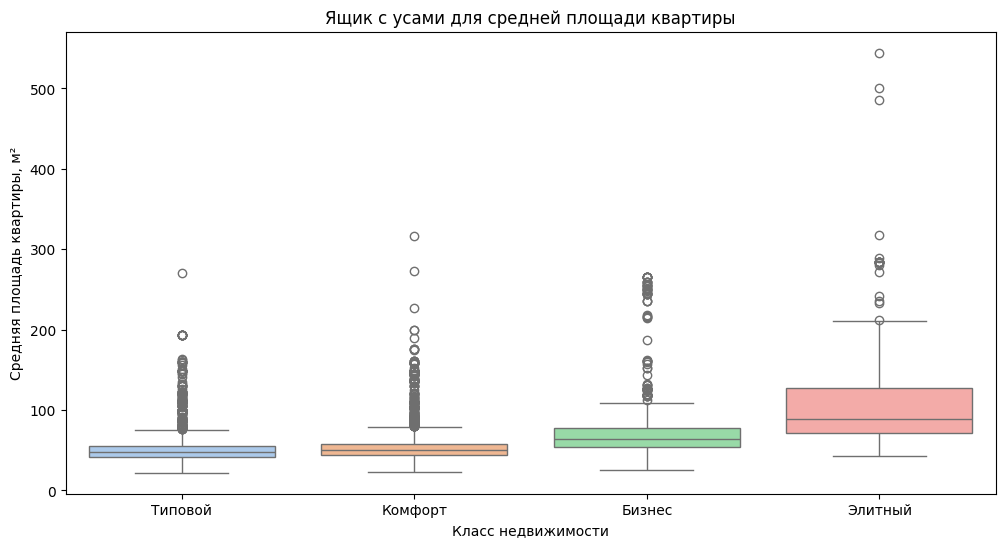

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_resid, x='class', y='av_flat', palette='pastel')
plt.xlabel('Класс недвижимости')
plt.ylabel('Средняя площадь квартиры, м²')
plt.title('Ящик с усами для средней площади квартиры')
plt.show()

Средняя площадь квартиры увеличивается с повышением класса недвижимости

## Потолки

<ipython-input-33-dbbcf581cd18>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='min_ceiling_height', data=df_resid, palette='pastel',  ax=axs[0])
<ipython-input-33-dbbcf581cd18>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='max_ceiling_height', data=df_resid, palette='pastel', ax=axs[1])


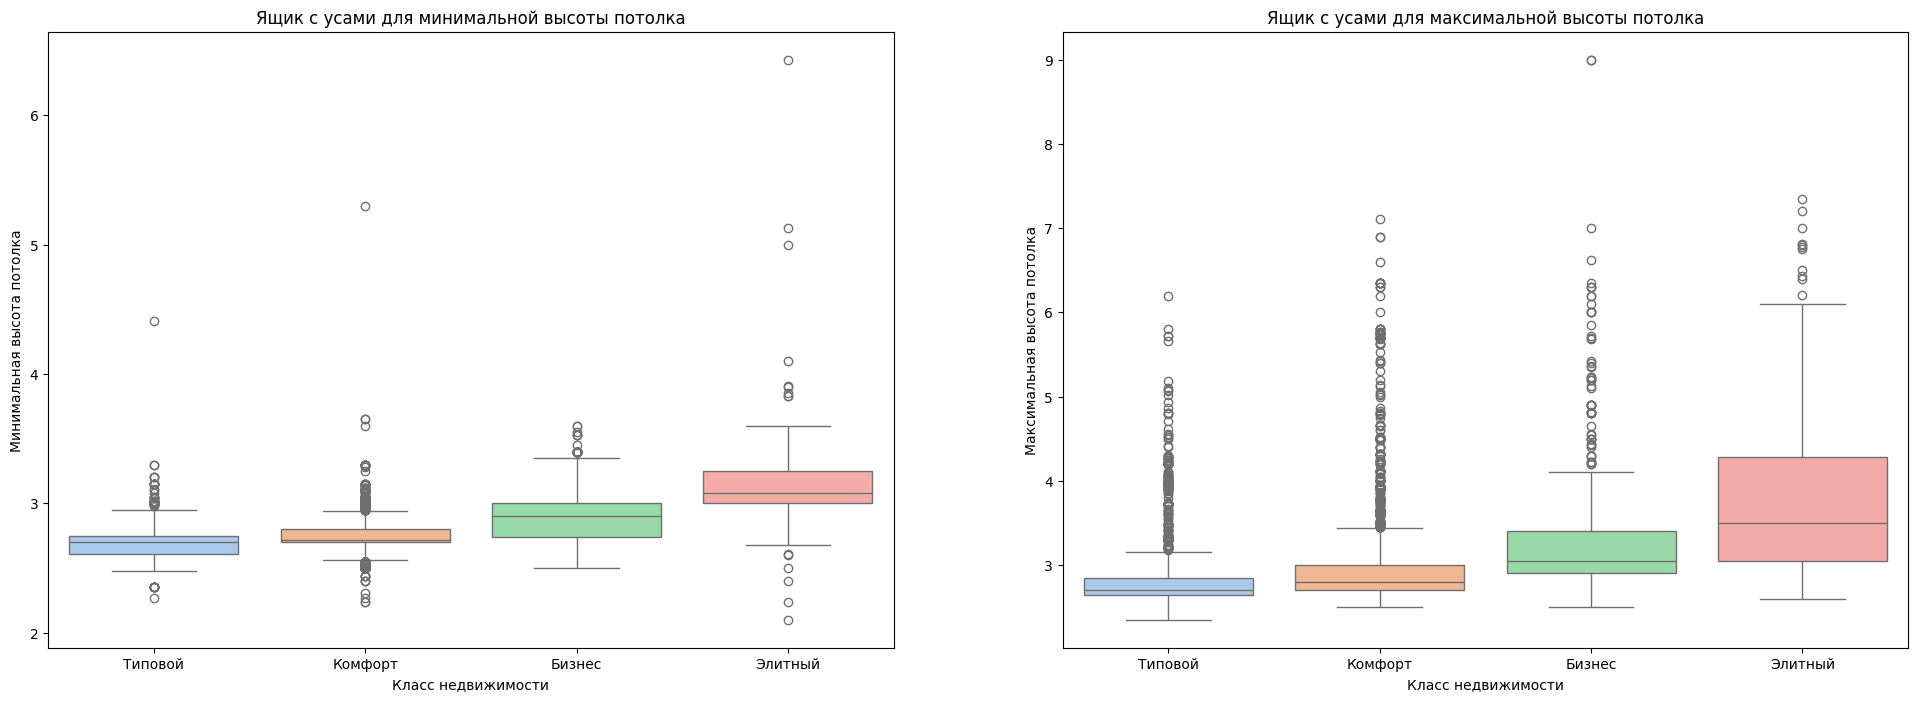

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# Построение зависимости минимальной высоты потолка от класса недвижимости
sns.boxplot(x='class', y='min_ceiling_height', data=df_resid, palette='pastel',  ax=axs[0])
axs[0].set_xlabel('Класс недвижимости')
axs[0].set_ylabel('Минимальная высота потолка')
axs[0].set_title('Ящик с усами для минимальной высоты потолка')


# Построение зависимости минимальной высоты потолка от класса недвижимости
sns.boxplot(x='class', y='max_ceiling_height', data=df_resid, palette='pastel', ax=axs[1])
axs[1].set_xlabel('Класс недвижимости')
axs[1].set_ylabel('Максимальная высота потолка')
axs[1].set_title('Ящик с усами для максимальной высоты потолка')
plt.show()

С повышением класса недвижимости увеличиваются минимальная и максимальная высота потолка, а соответственно этот диапазон сдвигается вверх.

## Количество этажей

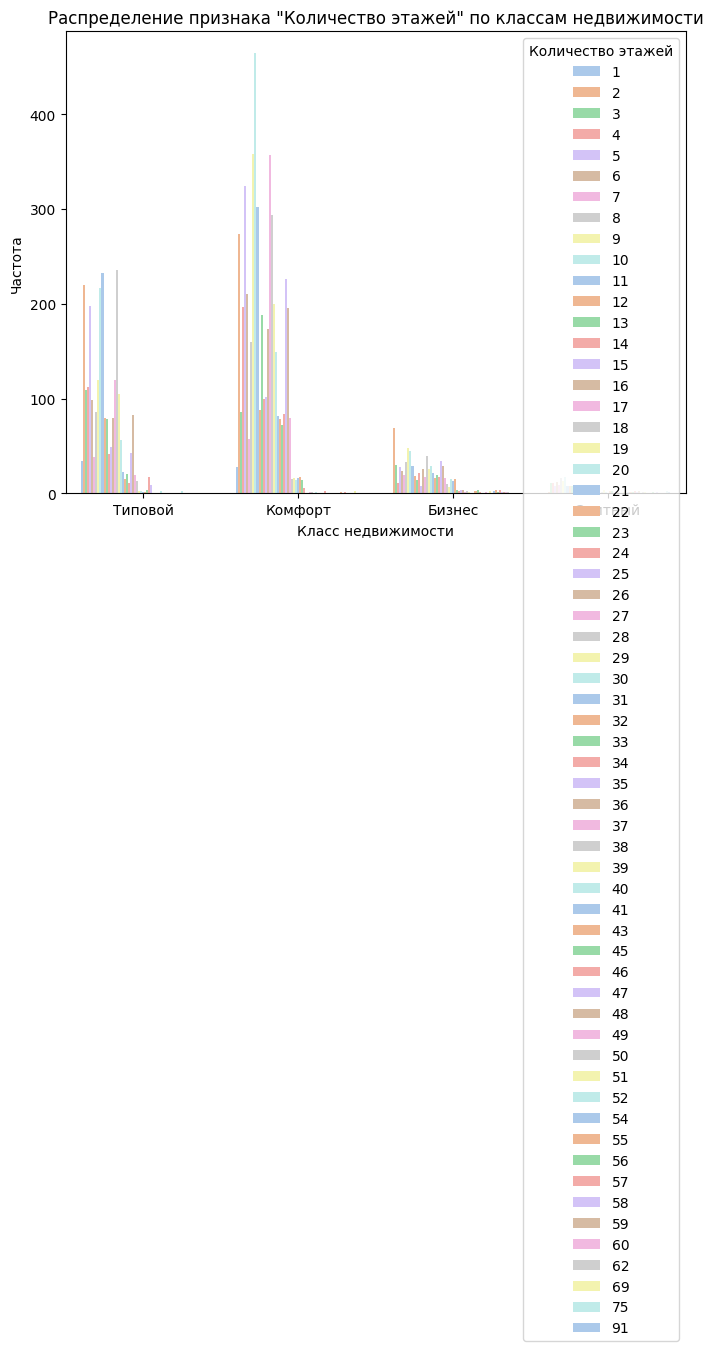

In [ ]:
# Построение распределения признака 'Количество этажей' по классам недвижимости
plt.figure(figsize=(8,6))
sns.countplot(x='class', hue='n_floors', data=df_resid, palette='pastel')
plt.xlabel('Класс недвижимости')
plt.ylabel('Частота')
plt.title('Распределение признака "Количество этажей" по классам недвижимости')
plt.legend(title='Количество этажей', loc='upper right')
plt.show()

## Паркинг

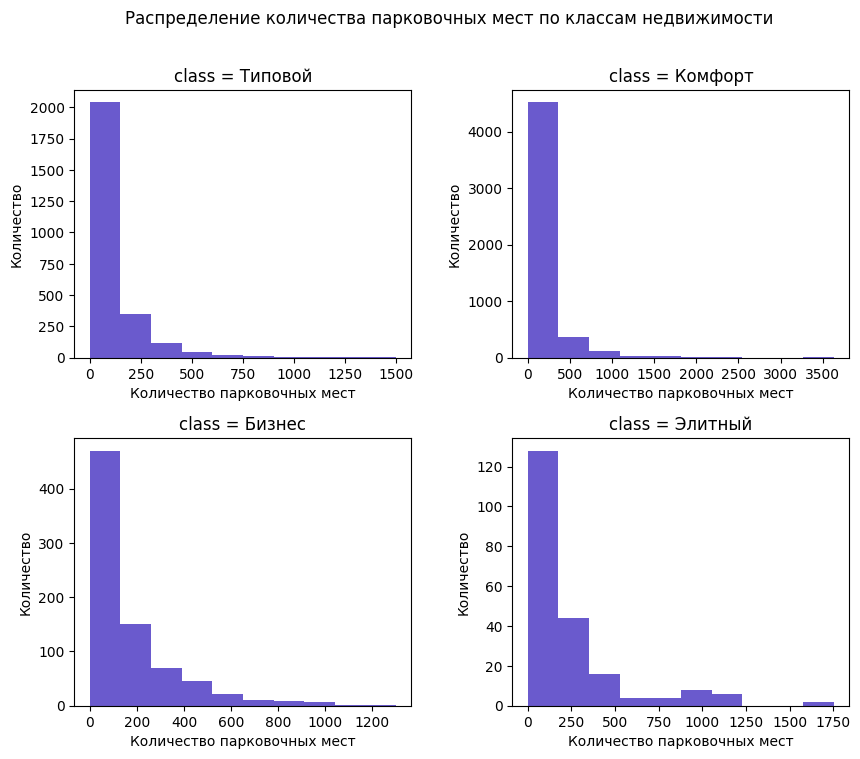

In [31]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.hist(df_resid.loc[df_resid['class']=='Типовой']['n_parking_places'],  linewidth=2, color="slateblue")
ax1.set_title('class = Типовой')
ax1.set_xlabel('Количество парковочных мест')
ax1.set_ylabel('Количество')

ax2.hist(df_resid.loc[df_resid['class']=='Комфорт']['n_parking_places'],linewidth=2, color="slateblue")
ax2.set_title('class = Комфорт')
ax2.set_xlabel('Количество парковочных мест')
ax2.set_ylabel('Количество')

ax3.hist(df_resid.loc[df_resid['class']=='Бизнес']['n_parking_places'], linewidth=2, color="slateblue")
ax3.set_title('class = Бизнес')
ax3.set_xlabel('Количество парковочных мест')
ax3.set_ylabel('Количество')

ax4.hist(df_resid.loc[df_resid['class']=='Элитный']['n_parking_places'], linewidth=2, color="slateblue")
ax4.set_title('class = Элитный')
ax4.set_xlabel('Количество парковочных мест')
ax4.set_ylabel('Количество')

pl.suptitle("Распределение количества парковочных мест по классам недвижимости")
plt.show()


<ipython-input-35-a66d8e55ef4a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='n_parking_places', data=df_resid, palette = 'pastel')


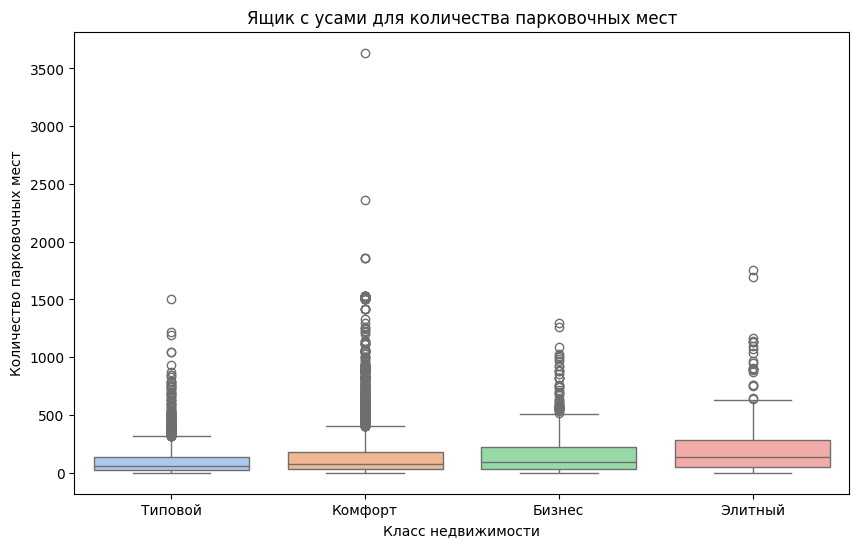

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='n_parking_places', data=df_resid, palette = 'pastel')
plt.xlabel('Класс недвижимости')
plt.ylabel('Количество парковочных мест')
plt.title('Ящик с усами для количества парковочных мест')
plt.show()

Есть некоторые выбросы. Посмотрим на них.


In [44]:
df_resid.loc[df_resid['n_parking_places'] > 1500]

,id,name,energy_efficiency,due_date,class,wall_material,n_finish_types,layout_variation,n_floors,n_flats,...,low_mobility_facilities,n_entrances,n_p_lifts,n_f_lifts,n_lifts,lift_ratio,infrastr_access,transport_access,green_areas,air_quality
545,27525,"МКР ""Родные Просторы""",C,2026-02-01,Комфорт,Монолит-кирпич,0,False,1,976,...,0.5,5.0,0,0,0,0.000000,4,NaN,NaN,NaN
547,27524,"МКР ""Родные Просторы""",C,2026-01-01,Комфорт,Монолит-кирпич,0,False,25,976,...,0.5,5.0,2,4,6,145.098667,4,NaN,NaN,NaN
548,27515,"МКР ""Родные Просторы""",C,2030-03-01,Комфорт,Монолит-кирпич,0,False,19,368,...,0.5,2.0,2,6,8,39.463158,4,NaN,NaN,NaN
549,27509,"МКР ""Родные Просторы""",C,2024-04-01,Комфорт,Монолит-кирпич,0,False,19,184,...,0.5,1.0,2,4,6,26.308772,3,NaN,NaN,NaN
550,27516,"МКР ""Родные Просторы""",C,2029-04-01,Комфорт,Монолит-кирпич,0,False,11,160,...,0.5,2.0,6,18,24,5.030303,4,NaN,NaN,NaN
551,27518,"МКР ""Родные Просторы""",C,2024-02-01,Комфорт,Монолит-кирпич,1,False,19,368,...,0.5,2.0,2,6,8,39.463158,4,NaN,NaN,NaN
552,27514,"МКР ""Родные Просторы""",C,2031-02-01,Комфорт,Монолит-кирпич,0,False,19,904,...,0.5,6.0,6,18,24,32.314035,4,NaN,NaN,NaN
555,27511,"МКР ""Родные Просторы""",C,2025-04-01,Комфорт,Монолит-кирпич,0,False,19,168,...,0.5,1.0,2,4,6,24.021053,3,NaN,NaN,NaN
557,27517,"МКР ""Родные Просторы""",C,2024-02-01,Комфорт,Монолит-кирпич,0,False,19,368,...,0.5,2.0,2,6,8,39.463158,4,NaN,NaN,NaN
558,27512,"МКР ""Родные Просторы""",C,2025-04-01,Комфорт,Монолит-кирпич,0,False,19,184,...,0.5,1.0,1,3,4,39.463158,3,NaN,NaN,NaN


Для всех классов распределение парковочных мест примерно одинаковое. Однако можно заметить, что их количество растет с повышением класса недвижимости. Отсюда появляется наша **гипотеза** о том, что количество парковочных мест на квартиру положительно зависит от класса недвижимости.

## Транспортная доступность

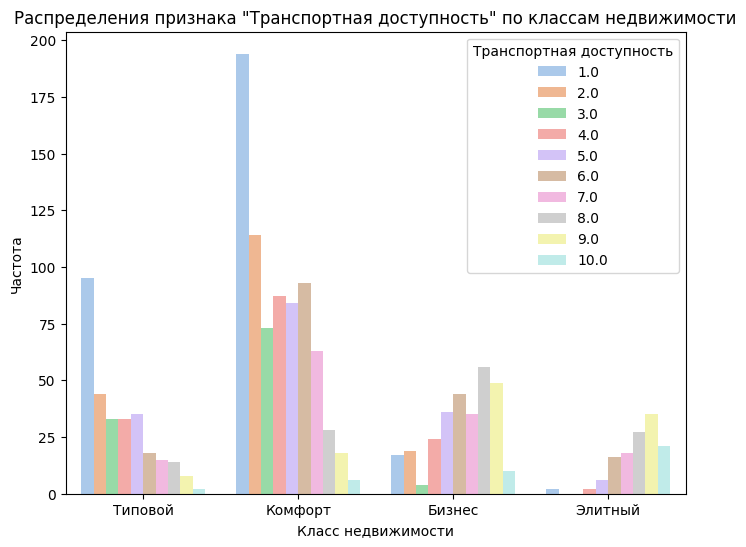

In [ ]:
# Построение распределения признака 'Транспортная доступность' по классам недвижимости
plt.figure(figsize=(8,6))
sns.countplot(x='class', hue='transport_access', data=df_resid, palette='pastel')
plt.xlabel('Класс недвижимости')
plt.ylabel('Частота')
plt.title('Распределения признака "Транспортная доступность" по классам недвижимости')
plt.legend(title='Транспортная доступность', loc='upper right')
plt.show()

## Доступность инфраструктуры

**Доступность инфраструктуры**
Чем выше класс недвижимости, тем больше доступ к инфраструктуре. Возьмем на заметку :)

PS. Увидели, что есть странный "выброс" для бизнес-класса; надо бы посмотреть на эти ЖК.

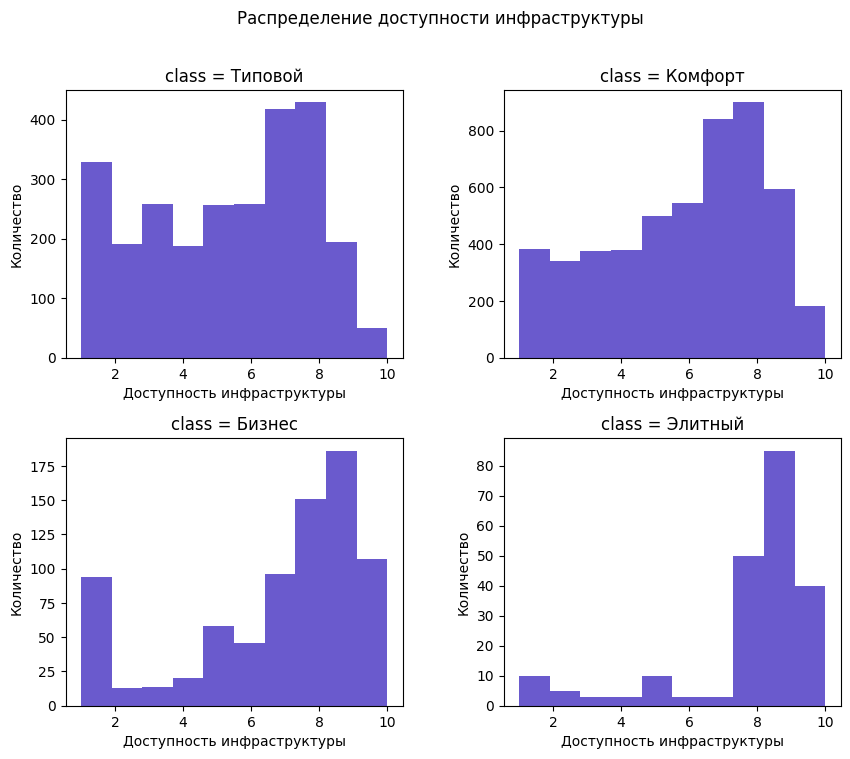

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.hist(df_resid.loc[df_resid['class']=='Типовой']['infrastr_access'],  linewidth=2, color="slateblue")
ax1.set_title('class = Типовой')
ax1.set_xlabel('Доступность инфраструктуры')
ax1.set_ylabel('Количество')

ax2.hist(df_resid.loc[df_resid['class']=='Комфорт']['infrastr_access'],linewidth=2, color="slateblue")
ax2.set_title('class = Комфорт')
ax2.set_xlabel('Доступность инфраструктуры')
ax2.set_ylabel('Количество')

ax3.hist(df_resid.loc[df_resid['class']=='Бизнес']['infrastr_access'], linewidth=2, color="slateblue")
ax3.set_title('class = Бизнес')
ax3.set_xlabel('Доступность инфраструктуры')
ax3.set_ylabel('Количество')

ax4.hist(df_resid.loc[df_resid['class']=='Элитный']['infrastr_access'], linewidth=2, color="slateblue")
ax4.set_title('class = Элитный')
ax4.set_xlabel('Доступность инфраструктуры')
ax4.set_ylabel('Количество')

pl.suptitle("Распределение доступности инфраструктуры")
plt.show()

## Детские и спортивные площадки

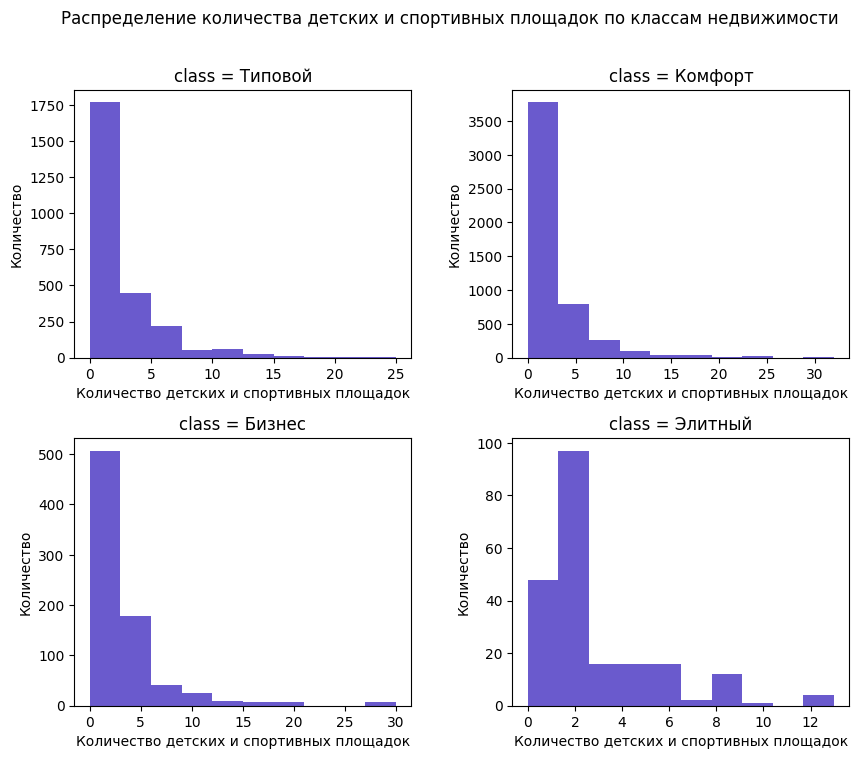

In [30]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax1.hist(df_resid.loc[df_resid['class']=='Типовой']['n_p_s_grounds'],  linewidth=2, color="slateblue")
ax1.set_title('class = Типовой')
ax1.set_xlabel('Количество детских и спортивных площадок')
ax1.set_ylabel('Количество')

ax2.hist(df_resid.loc[df_resid['class']=='Комфорт']['n_p_s_grounds'],linewidth=2, color="slateblue")
ax2.set_title('class = Комфорт')
ax2.set_xlabel('Количество детских и спортивных площадок')
ax2.set_ylabel('Количество')

ax3.hist(df_resid.loc[df_resid['class']=='Бизнес']['n_p_s_grounds'], linewidth=2, color="slateblue")
ax3.set_title('class = Бизнес')
ax3.set_xlabel('Количество детских и спортивных площадок')
ax3.set_ylabel('Количество')

ax4.hist(df_resid.loc[df_resid['class']=='Элитный']['n_p_s_grounds'], linewidth=2, color="slateblue")
ax4.set_title('class = Элитный')
ax4.set_xlabel('Количество детских и спортивных площадок')
ax4.set_ylabel('Количество')

pl.suptitle("Распределение количества детских и спортивных площадок по классам недвижимости")
plt.show()

<ipython-input-14-f7e8a288579e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='n_p_s_grounds', data=df_resid, palette='pastel')


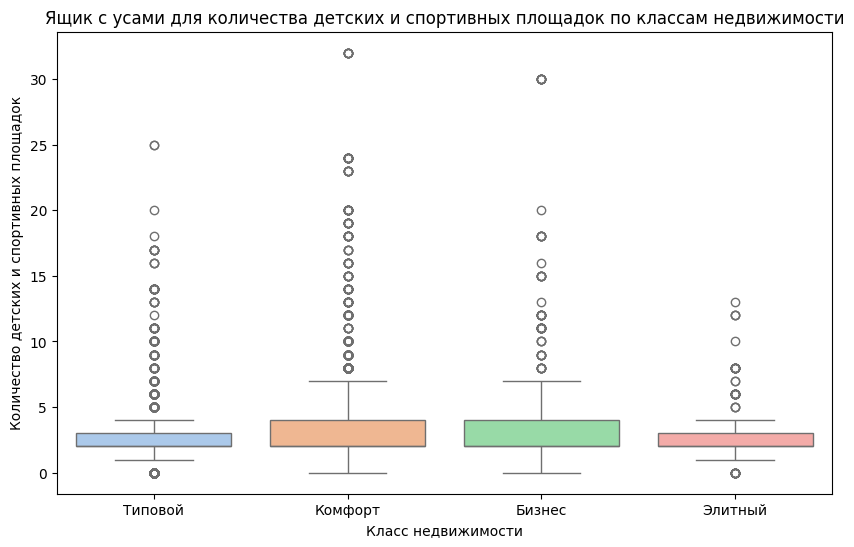

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='n_p_s_grounds', data=df_resid, palette='pastel')
plt.xlabel('Класс недвижимости')
plt.ylabel('Количество детских и спортивных площадок')
plt.title('Ящик с усами для количества детских и спортивных площадок по классам недвижимости')
plt.show()

Мы видим, что для классов "Комфорт" и "Бизнес" количество детских и спортивных площадок больше. Но нельзя сказать, что этот признак строго положительно коррелирует с классом недвижимости. Мы выдвигаем **гипотезу**, что количество детских и спортивных площадок не зависит от класса недвижимости

## Материал стен

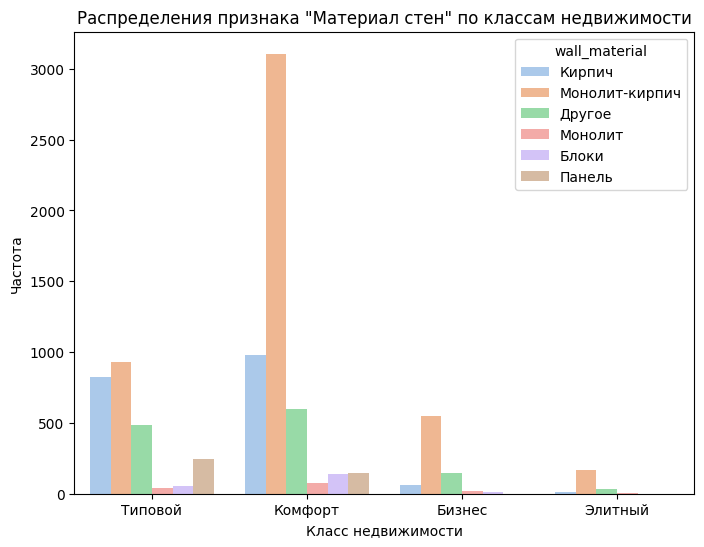

In [ ]:
# Построение распределения признака 'Материал стен' по классам недвижимости
plt.figure(figsize=(8,6))
ax = sns.countplot(x='class', hue='wall_material', data=df_resid, palette='pastel')
plt.xlabel('Класс недвижимости')
plt.ylabel('Частота')
plt.title('Распределения признака "Материал стен" по классам недвижимости')
plt.legend(title='wall_material')

plt.show()

In [ ]:
df_resid.loc[df_resid['class']=='Типовой'].head()

,id,name,energy_efficiency,due_date,class,wall_material,n_finish_types,layout_variation,n_floors,n_flats,...,low_mobility_facilities,n_entrances,n_p_lifts,n_f_lifts,n_lifts,lift_ratio,infrastr_access,transport_access,green_areas,air_quality
0,50878,"п. Металлплощадка, б-р Строителей, д. 71, корп...",B,2025-04-01,Типовой,Кирпич,1,True,4,50,...,0.5,7,0,0,0,0.00000,5,NaN,NaN,NaN
8,46437,"ЖК ""Радуга Сибири""",B,2024-04-01,Типовой,Монолит-кирпич,0,False,18,571,...,0.5,4,0,8,8,60.66875,6,2.0,NaN,NaN
9,56382,"ЖК ""Радуга Сибири""",B,2025-02-01,Типовой,Монолит-кирпич,1,False,18,570,...,0.5,4,4,4,8,60.56250,8,5.0,NaN,NaN
11,56915,"ЖК ""Скандинавия""",A,2024-04-01,Типовой,Другое,1,False,1,1,...,0.5,1,0,0,0,0.00000,1,NaN,NaN,NaN
12,55789,"ЖК ""Скандинавия""",A,2024-02-01,Типовой,Другое,1,False,1,1,...,0.5,1,0,0,0,0.00000,1,NaN,NaN,NaN


## Класс энергетической эффективности

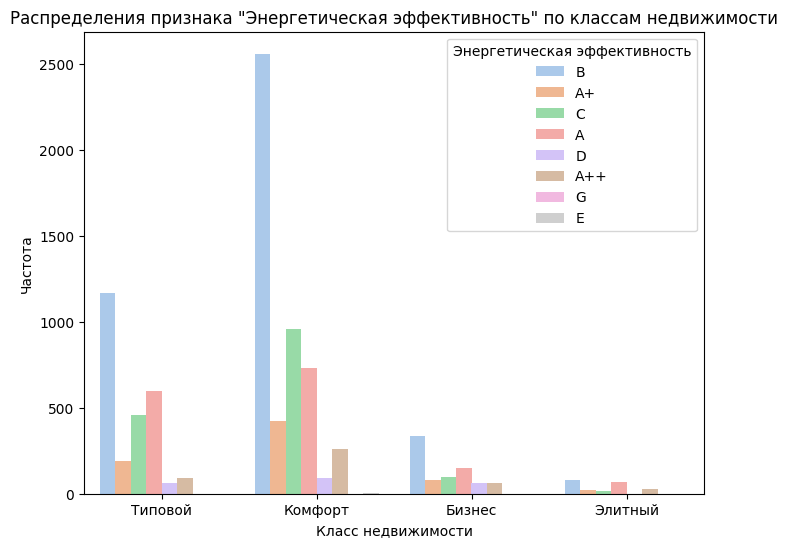

In [ ]:
# Построение распределения признака 'Класс энергетической эффективности' по классам недвижимости
plt.figure(figsize=(8,6))
ax = sns.countplot(x='class', hue='energy_efficiency', data=df_resid, palette='pastel')
total = df_resid['energy_efficiency'].count()
plt.xlabel('Класс недвижимости')
plt.ylabel('Частота')
plt.title('Распределения признака "Энергетическая эффективность" по классам недвижимости')
plt.legend(title='Энергетическая эффективность')

plt.show()

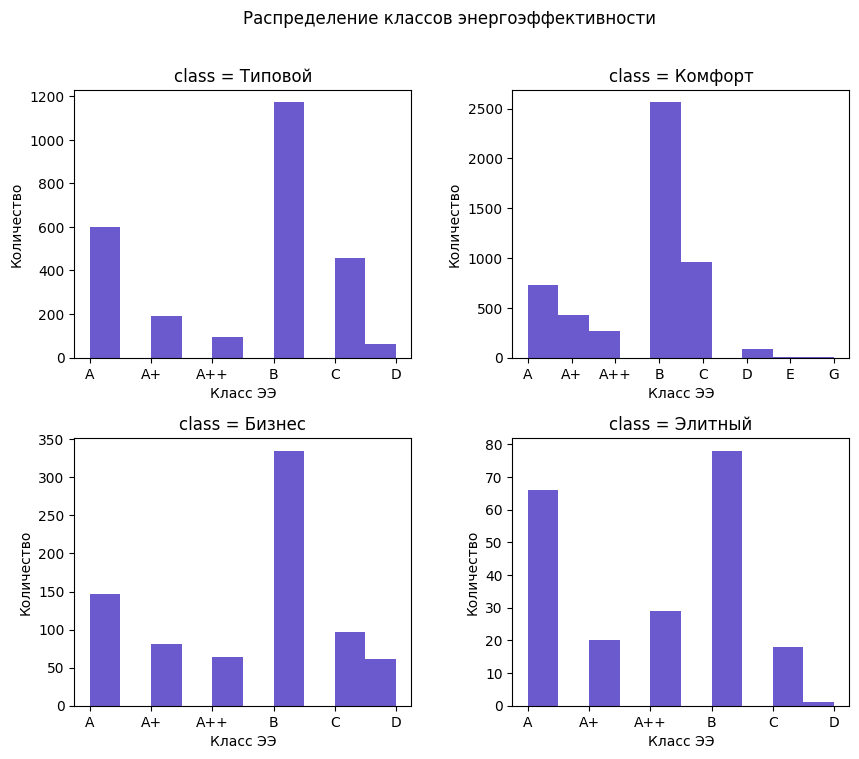

In [29]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))


plt.subplots_adjust(wspace=0.3, hspace=0.3)
df = df_resid.sort_values(by=['energy_efficiency'])
ax1.hist(df.loc[df['class']=='Типовой']['energy_efficiency'],  linewidth=2, color="slateblue")
ax1.set_title('class = Типовой')
ax1.set_xlabel('Класс ЭЭ')
ax1.set_ylabel('Количество')

ax2.hist(df.loc[df['class']=='Комфорт']['energy_efficiency'],linewidth=2, color="slateblue")
ax2.set_title('class = Комфорт')
ax2.set_xlabel('Класс ЭЭ')
ax2.set_ylabel('Количество')

ax3.hist(df.loc[df['class']=='Бизнес']['energy_efficiency'], linewidth=2, color="slateblue")
ax3.set_title('class = Бизнес')
ax3.set_xlabel('Класс ЭЭ')
ax3.set_ylabel('Количество')

ax4.hist(df.loc[df['class']=='Элитный']['energy_efficiency'], linewidth=2, color="slateblue")
ax4.set_title('class = Элитный')
ax4.set_xlabel('Класс ЭЭ')
ax4.set_ylabel('Количество')

#labels = ['A++', 'A+', 'A', 'B', 'C', 'D', 'F', 'G']
#plt.sca(ax1)
#plt.xticks(range(1, len(labels) + 1), labels)

#plt.sca(ax2)
#plt.xticks(range(1, len(labels) + 1), labels)

#plt.sca(ax3)
#plt.xticks(range(1, len(labels) + 1), labels)

#plt.sca(ax4)
#plt.xticks(range(1, len(labels) + 1), labels)

pl.suptitle("Распределение классов энергоэффективности")

plt.show()

**Энергетическая эффективность**
В среднем мы видим примерно одинаковое распределение класса энергоэффективности в четырех рассматриваемых классах недвижимости. Что позволяет нам предпологать, что

## Качество воздуха

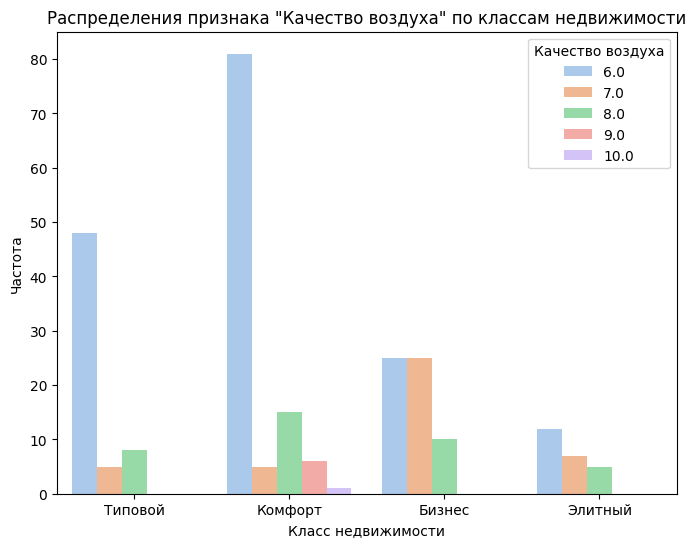

In [ ]:
# Построение распределения признака 'Качество воздуха' по классам недвижимости
plt.figure(figsize=(8,6))
sns.countplot(x='class', hue='air_quality', data=df_resid, palette='pastel')
plt.xlabel('Класс недвижимости')
plt.ylabel('Частота')
plt.title('Распределения признака "Качество воздуха" по классам недвижимости')
plt.legend(title='Качество воздуха', loc='upper right')
plt.show()

## Зеленые зоны

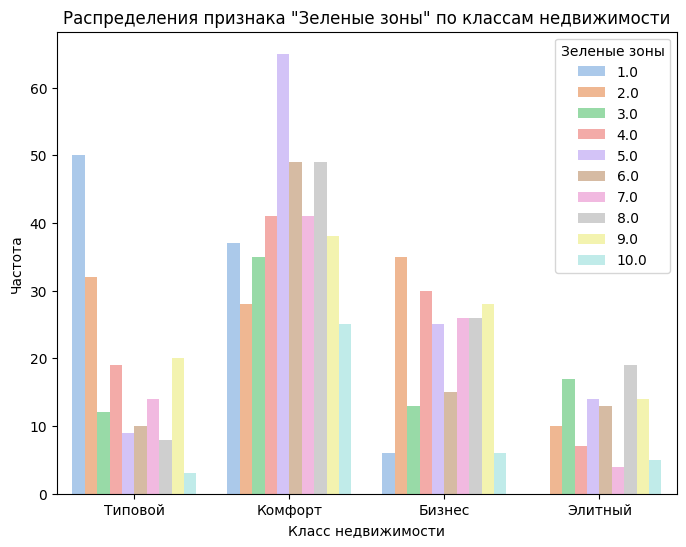

In [ ]:
# Построение распределения признака 'Зеленые зоны' по классам недвижимости
plt.figure(figsize=(8,6))
sns.countplot(x='class', hue='green_areas', data=df_resid, palette='pastel')
plt.xlabel('Класс недвижимости')
plt.ylabel('Частота')
plt.title('Распределения признака "Зеленые зоны" по классам недвижимости')
plt.legend(title='Зеленые зоны', loc='upper right')
plt.show()

# Корреляционная матрица

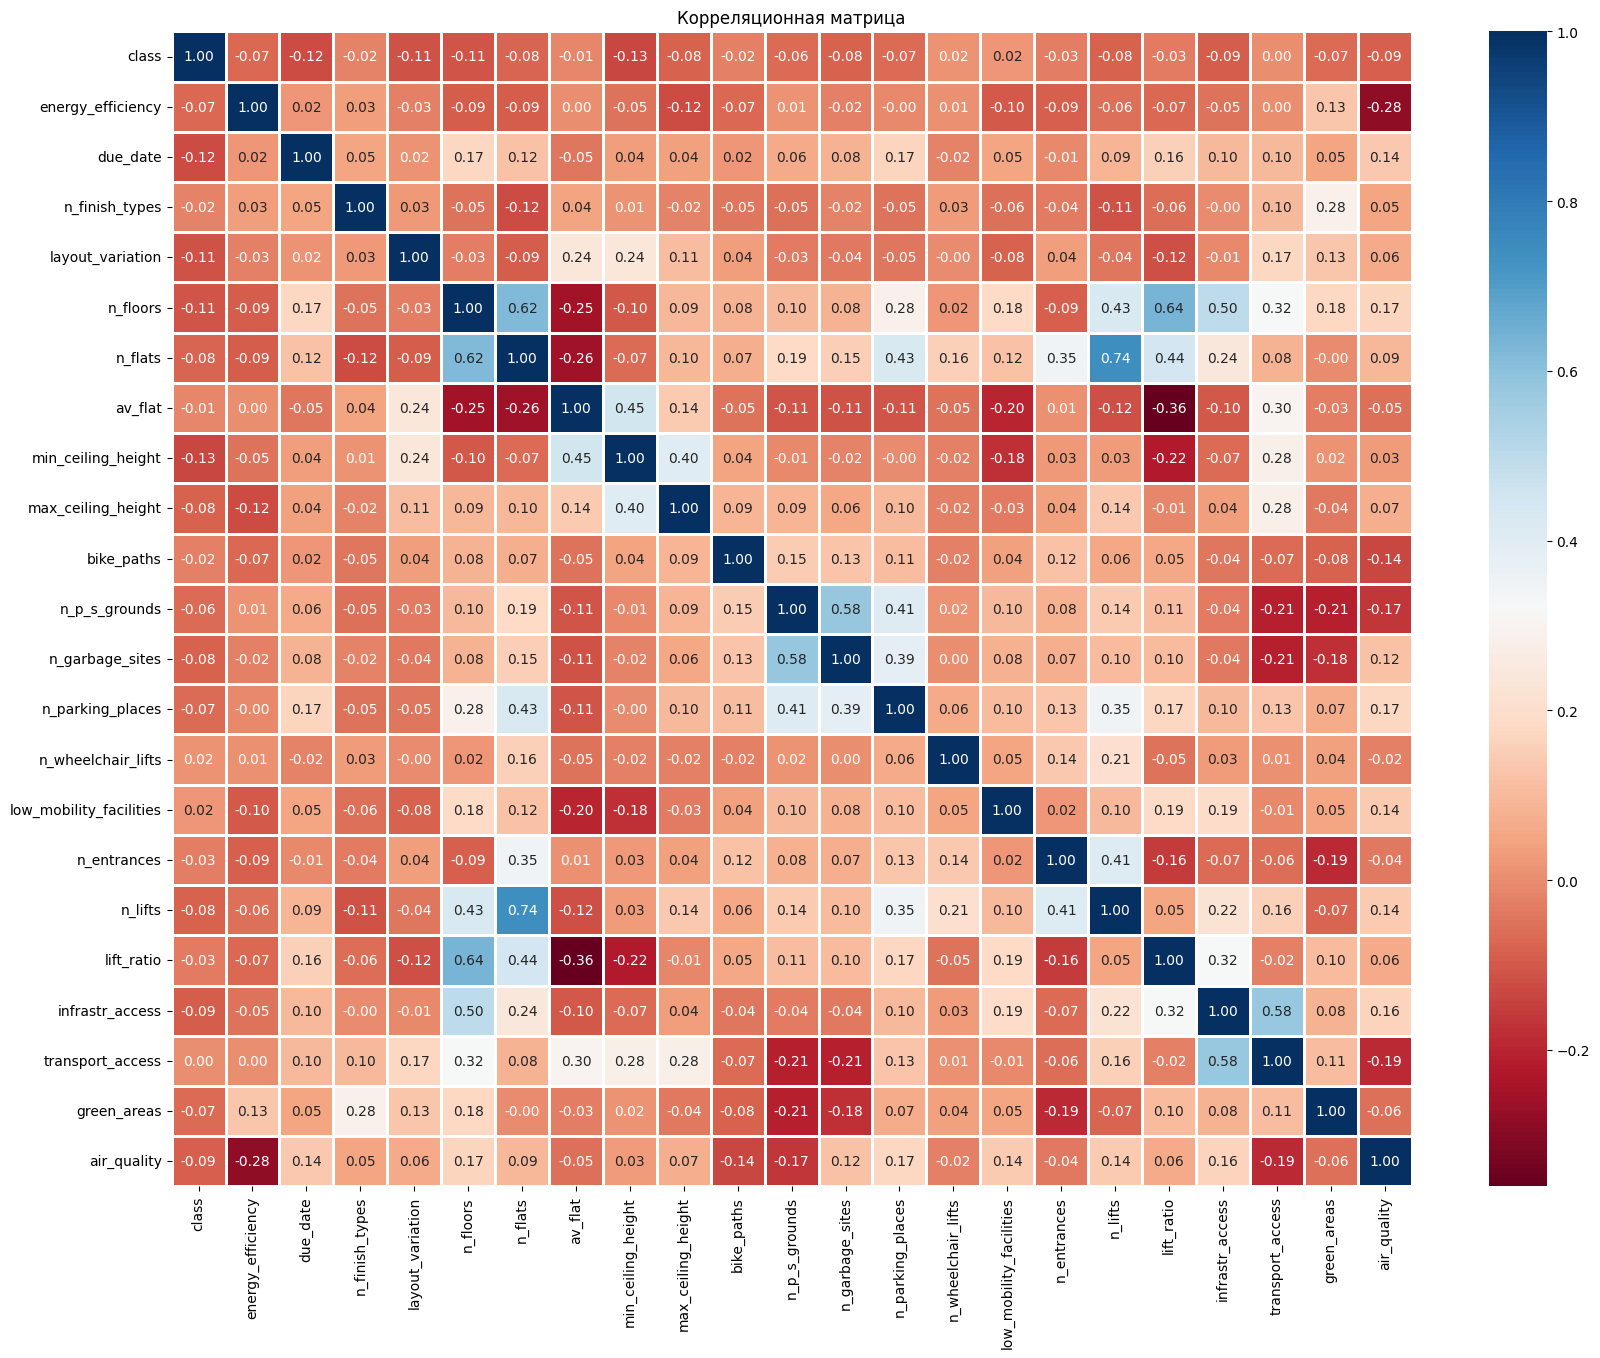

In [ ]:
to_drop = ['id', 'name', 'wall_material', 'life_space', 'n_playgrounds', 'n_sportsgrounds', 'n_p_lifts', 'n_f_lifts', 'ramp', 'lowering_platforms']

df = df_resid.drop(to_drop, axis=1)
df.insert(0, 'class', df.pop('class')) #ставим колонку class на первое место, так как мы предсказываем эту переменную

label_enc = LabelEncoder()

df['class'] = label_enc.fit_transform(df['class'])
df['energy_efficiency'] = label_enc.fit_transform(df['energy_efficiency'])


# Построение корреляционной матрицы
corr_matrix = df.corr(method='pearson')

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=1, cmap="RdBu", annot_kws={"size": 10})
plt.title("Корреляционная матрица")
plt.show()


# Предварительные гипотезы

## Гипотеза 1
Энергетическая эффективность в домах комфорт и бизнес классов выше, чем в домах классов "Типовой" и "Элитный"

## Гипотеза 2
Средняя высота потолков и средняя площадь квартиры в домах позитивно влияет на класс энергоэффективности

## Гипотеза 3
Количество детских и спортивных площадок не зависит от класса недвижимости

## Гипотеза 4
Количество парковочных мест на квартиру положительно зависит от класса недвижимости

## Гипотеза 5
Уровень доступности среды для маломобильных лиц не связан с классом недвижимости

## Гипотеза 6
Индекс доступности инфраструктуры положительно влияет на класс недвижимости

## Гипотеза 7
Оснащённость жилого комплекса лифтами выше в недвижимости более высокого класса

!!! Визуализации сейчас находятся в процеесе оформления и не являются конечным вариантом, в дальнейшем они будут оформлены в связке с нашими гипотезами и выводами

#Машинное обучение (планы)

- Будем предсказывать переменную "class" - класс недвижимости. Это категориальная переменная

- Скорее всего разбиение выборки на треин и тест будет в соотношении 80/20

Скорее всего будем использовать какие-то из следующим моделей, так как они подходят для предсказывания категориальной переменной
- Логистическая регрессия - хорошо работает с бинарными и многоклассовыми классификациями
- SVM без ядра и с гауссовским ядром - эффективен для классификации с использованием различных ядер  
- Наивный байес (категориальный и мультиномиал) - простой и эффективный классификатор, который хорошо подходит для категориальных данных  
- Случайный лес - хорошо работает с большим количеством признаков и способна обрабатывать как категориальные, так и числовые признаки  
- KNN - может использоваться для предсказания категориальных переменных, но может быть вычислительно затратным при большом количестве признаков  
- Perceptron - эффективен при работе с большим количеством признаков и категориальными данными   
- Градиентный  бустинг - может дать хорошие результаты для классификации, включая предсказание категориальных переменных  
- Catboost - хорошо работает с категориальными данными (можно попробовать, если градиентный бустинг дал хорошие результаты)

Метрики
1. Матрица ошибок (Сonfusion matrix)
2. Меткость (Accuracy)
3. Точность (Precision)
4. Полнота (Recall)
5. F1-мера (F1-score)
Возможно, площадь под ROC-кривой (Area under ROC-curve, AUC-ROC), площадь под кривой полнота-точность (Area under precision-recall curve, AUC-PR)